# Least squares of an arbitrary function

Find more tutorials on my webpage: [yairmau.com](http://yairmau.com).

End product:
<figure>
  <img src="figures/least-squares.png" alt="least squares" width="600">
</figure>


## import stuff

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy.special
from scipy.optimize import curve_fit

## customize figure

In [7]:
plt.ioff()
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10));
fig.subplots_adjust(left=0.04, right=0.98, top=0.93, bottom=0.15,
                    hspace=0.05, wspace=0.02)

# configure axes and some function definitions
x = np.arange(0, 12, 0.4)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.set_xlim((x.min(), x.max()))
ax2.set_xlim((x.min(), x.max()))
ax1.set_ylim(-1, 3.5)
ax2.set_ylim(-1, 3.5)
plt.rcParams.update({'text.usetex':True,
                     'font.size': 22,       # more customizing https://matplotlib.org/users/customizing.html
                     'xtick.labelsize':16,
                     'ytick.labelsize':16,
                     'axes.labelsize':26,
                     'font.family':'serif',
                     'text.latex.preamble':[r'\usepackage{amsmath}']})
plt.rcParams.update()

## define some functions

In [8]:
def func(x, par0, par1, par2):
    """ Cosine function with 3 parameters """
    return par0 + np.cos(par1 * x + par2)

def add_rec(ax, c, v, col):
    """ Add rectangles to the figure """
    ax.add_patch(
        patches.Rectangle(
            c,          # (x,y)
            np.abs(v),  # width
            v,          # height
            alpha=0.4,
            color=col
        )
    )

## Now let's plot

[I don't know why, but running this for the first time raises an error. If I run all the cells a second time, then everything runs smoothly...]

In [9]:
par = (1, 2, 1) # the parameter values
# generating data with noise
y = func(x, *par) + (np.random.random(len(x)) - 0.5)
ax1.plot(x, y, marker='o', ls='None', markerfacecolor="blue")
ax2.plot(x, y, marker='o', ls='None', markerfacecolor="red")

# best fit
popt, pcov = curve_fit(func, x, y, p0=(1.5, 1.5, 2.5))  # p0 = initial guess
p0, p1, p2 = popt
# The total sum of squares (proportional to the variance of the data)
SStot = ((y - y.mean()) ** 2).sum()
# The sum of squares of residuals
SSres = ((y - func(x, p0, p1, p2)) ** 2).sum()
Rsquared = 1 - SSres / SStot
# plot best fit
h = np.linspace(x.min(), x.max(), 1001)
fit, = ax1.plot(h, func(h, p0, p1, p2), color='black', linewidth=2)
ax1.legend([fit], ["Best fit"], loc="upper right",
           frameon=False, handlelength=4)
# plot mean
mean, = ax2.plot(h, h * 0 + np.mean(y), ls='--', color='black', linewidth=2)
ax2.legend([mean], ["Mean"], loc="upper right", frameon=False, handlelength=4)

# plot blue and red squares
for ind in np.arange(len(x)):
    x0 = x[ind]
    y0 = y[ind]
    # print(x0,y0)
    v1 = y0 - func(x0, p0, p1, p2)
    v2 = y0 - y.mean()
    add_rec(ax1, (x0, y0), -v1, "blue")
    add_rec(ax2, (x0, y0), -v2, "red")

ax2.text(0.5, 2.7, r"Total sum of squares: {:.1f}".format(SStot))
ax1.text(0.5, 2.7, r"Sum of squares of residuals: {:.1f}".format(SSres))
ax2.set_xlabel(r"R-squared = $1 - \frac{\text{blue area}}{\text{red area}}$ = " +
               "{:.2f}".format(Rsquared), labelpad=25)
ax1.set_xlabel(r"Data: $f(x) = p_0 + \cos(p_1 x + p_2)+ $ noise ")
ax1.xaxis.set_label_position("top")

## Save and display

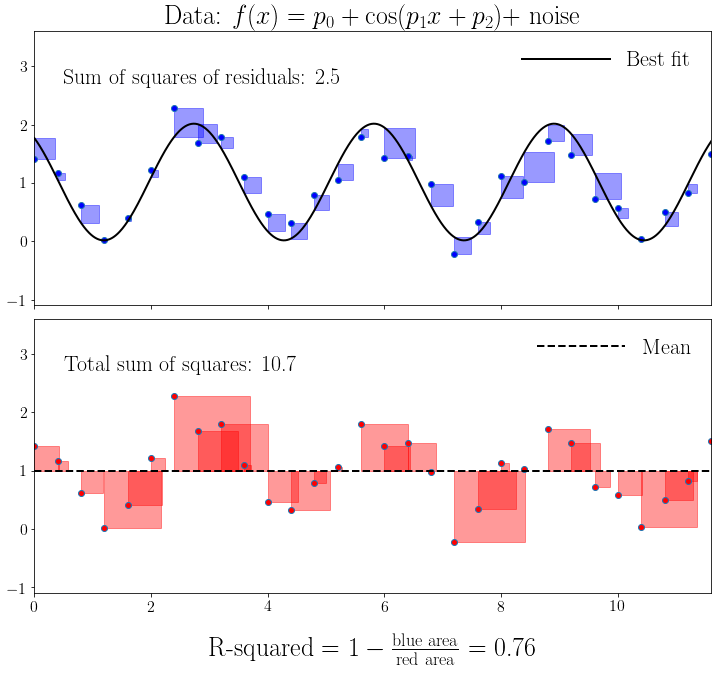

In [10]:
plt.savefig("figures/least-squares.png",dpi=300)
display(fig)